<a href="https://colab.research.google.com/github/felipeccoutinho/Data-Science/blob/main/Setembro_Amarelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Setembro Amarelo: Análise do Suicídio no Mundo e no Brasil </h1>

<h6>Em 2015 o Centro de Valorização da Vida (CVV) criou a campanha intitulada como “Setembro Amarelo” com o intuito de mostrar como é importante falar sobre esse assunto e que pode ajudar a salvar vidas. 
"Não importa onde e nem em que momento da vida você parou, sempre é possível recomeçar."</h6>

<h3>Origem do Setembro Amarelo</h3><br>

O Setembro Amarelo teve sua origem nos EUA, quando um jovem chamado Mike Emme, de 17 anos, cometeu suicídio, em 1994.

Em 1994, o americano Mike Emme, filho do casal Dale Emme e Darlene Emme, se suicidou com apenas 17 anos. Mike era conhecido por sua personalidade caridosa e por saber muito sobre mecânica. Sozinho, o garoto conseguiu restaurar um Mustang 68 e pintou o carro todo de amarelo.

Seus pais e amigos não perceberam que o jovem tinha sérios problemas psicológicos e não conseguiram evitar sua morte.

No dia do velório, foi feita uma cesta com muitos cartões decorados com fitas amarelas. Dentro deles tinha a mensagem "Se você precisar, peça ajuda.". A iniciativa foi o estopim para um movimento importante de prevenção ao suicídio, pois os cartões chegaram realmente às mãos de pessoas que precisavam de apoio.

Em consequência dessa triste história, foi escolhido como símbolo da luta contra o suicídio, o laço amarelo.

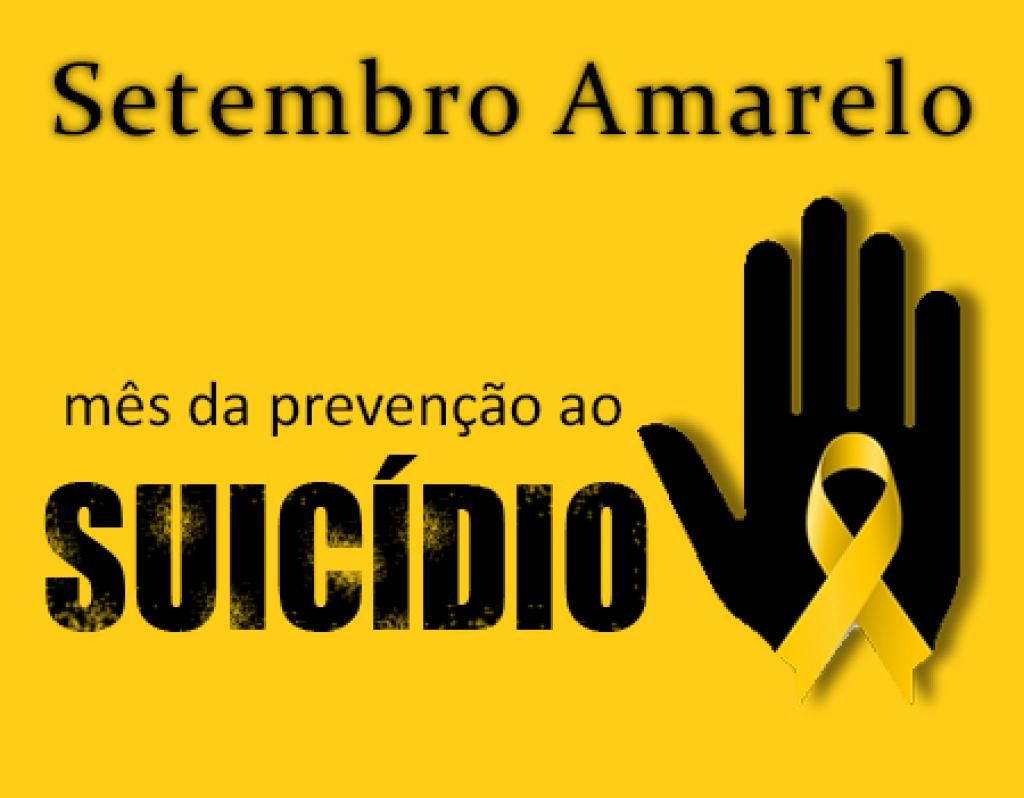

In [8]:
# importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
# importando o dataset do github
df = pd.read_csv('https://raw.githubusercontent.com/felipeccoutinho/Data-Science/main/master.csv')


In [5]:
#verificando o tamanho do dataset
df.shape

(27820, 12)

In [ ]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [7]:
# verificando se tem dados nulos no dataframe
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [27]:
#verificando se tem linhas duplicadas
df.duplicated().sum()

0

In [9]:
#selecionado os dados do Brasil
df_brasil = df[df.country == "Brazil"].copy()

# exibir as 5 primeiras entradas do novo DataFrame
df_brasil.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
4172,Brazil,1985,male,75+ years,129,840300,15.35,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4173,Brazil,1985,male,55-74 years,535,5364900,9.97,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4174,Brazil,1985,male,35-54 years,1011,11986300,8.43,Brazil1985,0.576,"222,942,790,435",1898,Silent
4175,Brazil,1985,male,25-34 years,791,10762900,7.35,Brazil1985,0.576,"222,942,790,435",1898,Boomers
4176,Brazil,1985,male,15-24 years,661,13834000,4.78,Brazil1985,0.576,"222,942,790,435",1898,Generation X


In [10]:
df_brasil.isnull().sum()

country                 0
year                    0
sex                     0
age                     0
suicides_no             0
population              0
suicides/100k pop       0
country-year            0
HDI for year          252
 gdp_for_year ($)       0
gdp_per_capita ($)      0
generation              0
dtype: int64

In [13]:
df_brasil.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
4539,Brazil,2015,female,25-34 years,466,17546090,2.66,Brazil2015,NaN,"1,802,214,373,741",9431,Millenials
4540,Brazil,2015,female,75+ years,89,3802086,2.34,Brazil2015,NaN,"1,802,214,373,741",9431,Silent
4541,Brazil,2015,female,15-24 years,397,17047218,2.33,Brazil2015,NaN,"1,802,214,373,741",9431,Millenials
4542,Brazil,2015,male,5-14 years,79,16057040,0.49,Brazil2015,NaN,"1,802,214,373,741",9431,Generation Z
4543,Brazil,2015,female,5-14 years,56,15430579,0.36,Brazil2015,NaN,"1,802,214,373,741",9431,Generation Z


In [28]:
#obtendo os dados de suicídios totais do Brasil por ano
total_brasil = df_brasil.groupby(by=["year"]).sum()
total_brasil.head()

,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,,,,,
1985,4228,117478900,59.18,6.912,22776
1986,4271,118776400,57.16,0.000,27084
1987,4672,122822467,70.12,0.000,28728
1988,4466,125701294,65.36,0.000,31536
1989,4463,128570308,64.02,0.000,39720


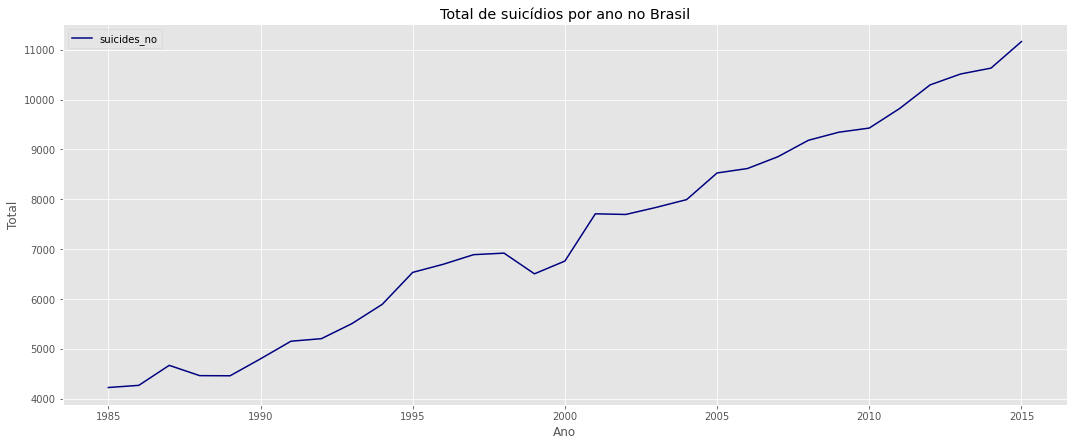

In [90]:
total_brasil['suicides_no'].plot(figsize=(18,7), color='navy');
plt.title("Total de suicídios por ano no Brasil");
plt.xlabel('Ano')
plt.ylabel('Total')

plt.legend();

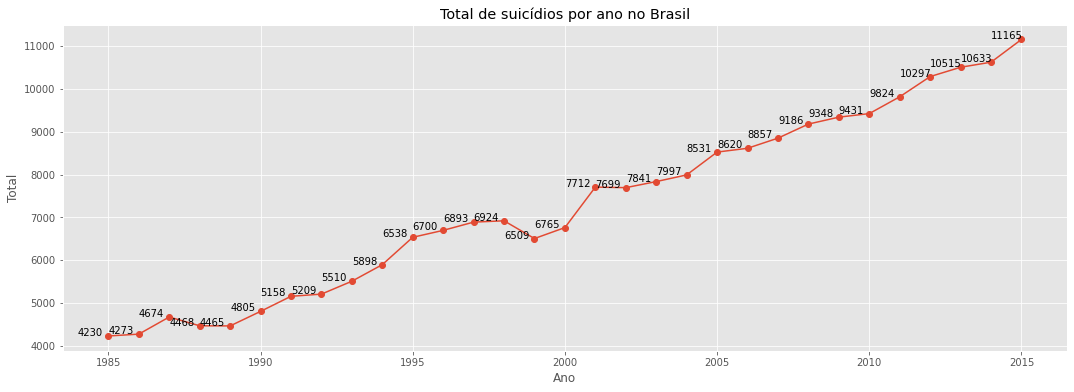

In [169]:
xs = total_brasil.index
ys = total_brasil['suicides_no']

fig, ax = plt.subplots() # inicializa Figure e Axes

ax.plot(xs, ys, marker='o')
for x, y in zip(xs, ys):  # adiciona um texto para cada ponto XY
    ax.text(x-1, y+2, y+2)
plt.title("Total de suicídios por ano no Brasil");
plt.xlabel('Ano')
plt.ylabel('Total')
plt.rcParams["figure.figsize"] = (16, 6)
plt.show()

In [78]:
#total por gênero em valores absolutos
total_brasil_genero = df_brasil.groupby('sex').suicides_no.sum()
total_brasil_genero.head()

sex
female     49015
male      177598
Name: suicides_no, dtype: int64

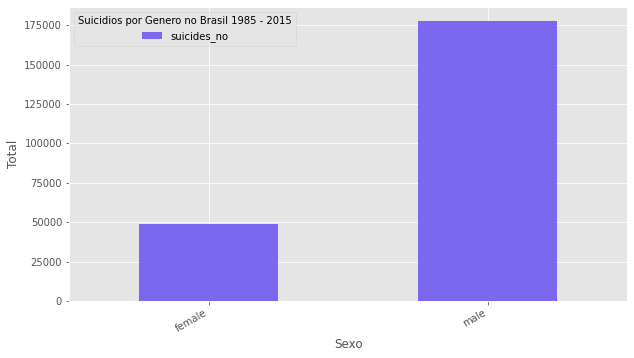

In [84]:
total_brasil_genero.plot.bar(stacked=True, align='center', color='mediumslateblue', figsize=(10,6))
plt.legend(title="Suicidios por Genero no Brasil 1985 - 2015");
### Construindo o gráfico ###
plt.xlabel('Sexo')
plt.ylabel('Total')

# Organiza o eixo x de modo a facilitar a visulização dos dados
plt.gcf().autofmt_xdate() 
plt.show()

In [ ]:
#total por gênero em percentual 
total_brasil_genero_perc = df_brasil.groupby('sex').suicides_no.sum() / df_brasil.groupby('sex').suicides_no.sum().sum()
total_brasil_genero_perc.head()

sex
female    0.216294
male      0.783706
Name: suicides_no, dtype: float64

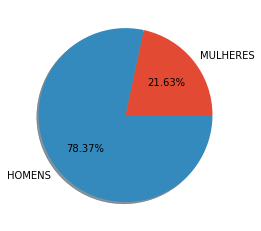

In [ ]:
plt.pie(total_brasil_genero_perc, labels=['MULHERES', 'HOMENS'], autopct='%1.2f%%', shadow=True);


In [68]:
#total por faixa etária em valores absolutos
total_brasil_idade = df_brasil.groupby('age').suicides_no.sum()
total_brasil_idade.sort_values().head(6)

age
5-14 years      3029
75+ years       9037
55-74 years    37556
15-24 years    44597
25-34 years    52534
35-54 years    79860
Name: suicides_no, dtype: int64

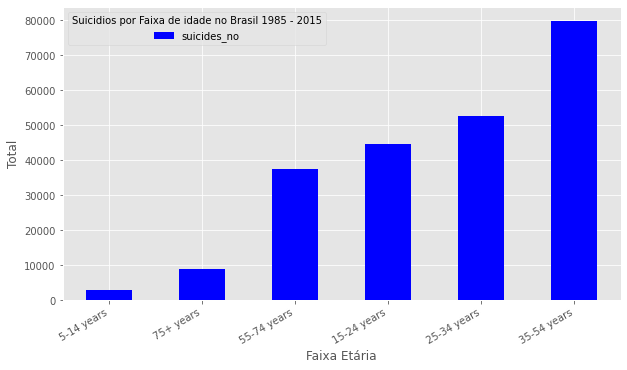

In [163]:
total_brasil_idade.sort_values().plot.bar(stacked=True, align='center', color='blue',figsize=(10,6))
plt.legend(title="Suicidios por Faixa de idade no Brasil 1985 - 2015");
### Construindo o gráfico ###
plt.xlabel('Faixa Etária')
plt.ylabel('Total')

# Organiza o eixo x de modo a facilitar a visulização dos dados
plt.gcf().autofmt_xdate() 
plt.show()


In [75]:
total_brasil_idade_perc = df_brasil.groupby('age').suicides_no.sum() / df_brasil.groupby('age').suicides_no.sum().sum()
total_brasil_idade_perc.sort_values().head(6)

age
5-14 years     0.013366
75+ years      0.039879
55-74 years    0.165727
15-24 years    0.196798
25-34 years    0.231823
35-54 years    0.352407
Name: suicides_no, dtype: float64

Percebe que a faixa etária com número de suicidios absolutos no Brasil é entre 35-54 anos com um valor absoluto de 79860 o que representa mais de 35% 